In [84]:
from matplotlib import dates as mdate
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from time import sleep
from IPython.display import clear_output
import numpy as np

In [85]:
# do some basic cleaning of outliers

m = pd.read_csv("../Raw usable data/Laura/Paddling data - Laura Optimal - Master.csv")

cdate = m["Elapsed time (s)"]

print(m)

PhoneAccelZ = m["Phone-Accel-Z"]
PhoneAccelY = m["Phone-Accel-Y"]
PhoneAccelX = m["Phone-Accel-X"]

WatchAccelZ = m["Watch-Accel-Z"]
WatchAccelY = m["Watch-Accel-Y"]
WatchAccelX = m["Watch-Accel-X"]

PhoneGyroZ = m["Phone-Gyro-Z"]
PhoneGyroY = m["Phone-Gyro-Y"]
PhoneGyroX = m["Phone-Gyro-X"]

WatchGyroZ = m["Watch-Gyro-Z"]
WatchGyroY = m["Watch-Gyro-Y"]
WatchGyroX = m["Watch-Gyro-X"]

PhoneMagZ = m["Phone-Mag-Z"]
PhoneMagY = m["Phone-Mag-Y"]
PhoneMagX = m["Phone-Mag-X"]

WatchMagZ = m["Watch-Mag-Z"]
WatchMagY = m["Watch-Mag-Y"]
WatchMagX = m["Watch-Mag-X"]

       Elapsed time (s)  Unnamed: 1  Phone-Accel-Z  Phone-Accel-Y  \
0                  0.00         NaN      -0.673111      -0.498962   
1                  0.01         NaN      -0.676529      -0.499329   
2                  0.02         NaN      -0.678268      -0.500443   
3                  0.03         NaN      -0.678177      -0.503220   
4                  0.04         NaN      -0.679245      -0.508682   
...                 ...         ...            ...            ...   
11724               NaN         NaN            NaN            NaN   
11725               NaN         NaN            NaN            NaN   
11726               NaN         NaN            NaN            NaN   
11727               NaN         NaN            NaN            NaN   
11728               NaN         NaN            NaN            NaN   

       Phone-Accel-X  Watch-Accel-Z  Watch-Accel-Y  Watch-Accel-X  \
0           0.550842      -0.935211      -0.287689      -0.277924   
1           0.555374      -0.9494

In [86]:
startmark = 3000
endmark = 10300

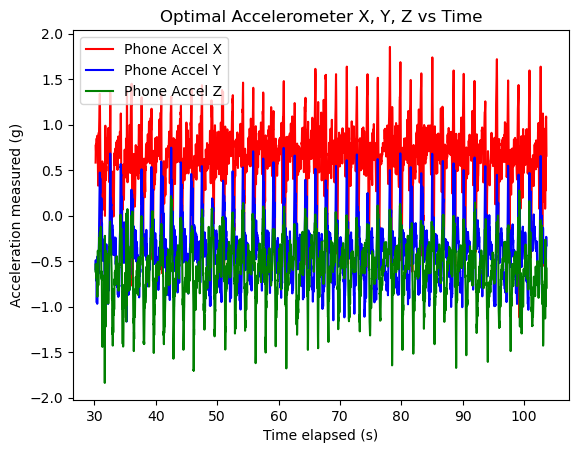

In [87]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Acceleration measured (g)")
plt.title("Optimal Accelerometer X, Y, Z vs Time")
plt.plot(cdate[startmark:endmark], PhoneAccelX[startmark:endmark], "-r", label="Phone Accel X") 
plt.plot(cdate[startmark:endmark], PhoneAccelY[startmark:endmark], "-b", label="Phone Accel Y") 
plt.plot(cdate[startmark:endmark], PhoneAccelZ[startmark:endmark], "-g", label="Phone Accel Z") 

plt.legend(loc="upper left")
plt.show()



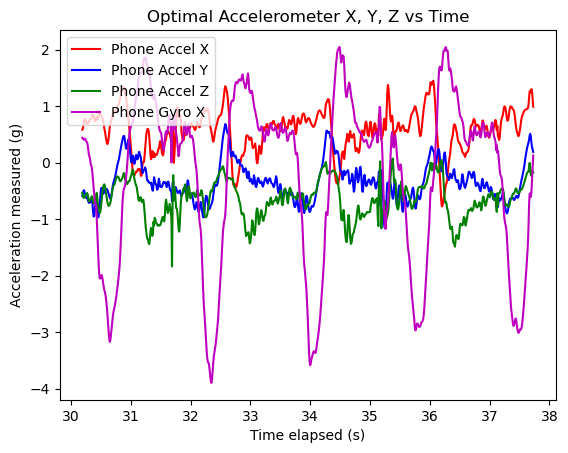

In [102]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Acceleration measured (g)")
plt.title("Optimal Accelerometer X, Y, Z vs Time")

tl = 750

plt.plot(cdate[startmark:startmark+tl], PhoneAccelX[startmark:startmark+tl], "-r", label="Phone Accel X") 
plt.plot(cdate[startmark:startmark+tl], PhoneAccelY[startmark:startmark+tl], "-b", label="Phone Accel Y") 
plt.plot(cdate[startmark:startmark+tl], PhoneAccelZ[startmark:startmark+tl], "-g", label="Phone Accel Z") 
plt.plot(cdate[startmark:startmark+tl], PhoneGyroX[startmark:startmark+tl], "-m", label="Phone Gyro X") 

plt.legend(loc="upper left")
plt.show()

# use gyro x as an indicator of when to split

In [130]:
splitdf = pd.DataFrame({"timekeeper": [0,0],
                        "Elapsed time (s)": [0,0],
                        "Phone-Accel-Z": [0,0],
                        "Phone-Accel-Y": [0,0],
                        "Phone-Accel-X": [0,0],
                        "Watch-Accel-Z": [0,0],
                        "Watch-Accel-Y": [0,0],
                        "Watch-Accel-X": [0,0],
                        "Phone-Gyro-Z": [0,0],
                        "Phone-Gyro-Y": [0,0],
                        "Phone-Gyro-X": [0,0],
                        "Watch-Gyro-Z": [0,0],
                        "Watch-Gyro-Y": [0,0],
                        "Watch-Gyro-X": [0,0],
                        "Phone-Mag-Z": [0,0],
                        "Phone-Mag-Y": [0,0],
                        "Phone-Mag-X": [0,0],
                        "Watch-Mag-Z": [0,0],
                        "Watch-Mag-Y": [0,0],
                        "Watch-Mag-X": [0,0],
                       })

print(splitdf)

lst = 0
i = startmark
totcount = 0
while (i < endmark):
    indicator = PhoneGyroX[i]
    
    # figure out whether this is a good enough indicator
    nxt = PhoneGyroX[i+1]
        
        
    # make sure it hasnt been triggered in the last 150 iterations
    if (indicator < -2.5 and nxt > indicator and i-lst > 150):
        lst = i
        # cut it off, add two blanks
        
        for j in range(100):
            splitdf.loc[len(splitdf)] = [totcount,0,
                                         0,0,0,
                                         0,0,0,
                                         0,0,0,
                                         0,0,0,
                                         0,0,0,
                                         0,0,0]
            totcount += 1
            

    
    splitdf.loc[len(splitdf)] = [totcount,cdate[i],
                                 PhoneAccelZ[i], PhoneAccelY[i], PhoneAccelX[i],
                                 WatchAccelZ[i], WatchAccelY[i], WatchAccelX[i],
                                 PhoneGyroZ[i], PhoneGyroY[i], PhoneGyroX[i],
                                 WatchGyroZ[i], WatchGyroY[i], WatchGyroX[i],
                                 PhoneMagZ[i], PhoneMagY[i], PhoneMagX[i],
                                 WatchMagZ[i], WatchMagY[i], WatchMagX[i]]
    totcount += 1
    
#     print(splitdf)
    i += 1
    

   timekeeper  Elapsed time (s)  Phone-Accel-Z  Phone-Accel-Y  Phone-Accel-X  \
0           0                 0              0              0              0   
1           0                 0              0              0              0   

   Watch-Accel-Z  Watch-Accel-Y  Watch-Accel-X  Phone-Gyro-Z  Phone-Gyro-Y  \
0              0              0              0             0             0   
1              0              0              0             0             0   

   Phone-Gyro-X  Watch-Gyro-Z  Watch-Gyro-Y  Watch-Gyro-X  Phone-Mag-Z  \
0             0             0             0             0            0   
1             0             0             0             0            0   

   Phone-Mag-Y  Phone-Mag-X  Watch-Mag-Z  Watch-Mag-Y  Watch-Mag-X  
0            0            0            0            0            0  
1            0            0            0            0            0  


In [131]:
splitdf

,timekeeper,Elapsed time (s),Phone-Accel-Z,Phone-Accel-Y,Phone-Accel-X,Watch-Accel-Z,Watch-Accel-Y,Watch-Accel-X,Phone-Gyro-Z,Phone-Gyro-Y,Phone-Gyro-X,Watch-Gyro-Z,Watch-Gyro-Y,Watch-Gyro-X,Phone-Mag-Z,Phone-Mag-Y,Phone-Mag-X,Watch-Mag-Z,Watch-Mag-Y,Watch-Mag-X
0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,30.19,-0.536667,-0.590256,0.583344,-0.901566,-0.247513,0.237854,0.561050,0.985354,0.440366,-0.037930,-0.076031,0.193756,-319.179810,-107.013977,-91.219940,-59.705673,61.077698,178.564941
3,1.0,30.20,-0.595215,-0.543304,0.605438,-0.894196,-0.261230,0.225098,0.568520,1.030267,0.423193,-0.057803,-0.070468,0.175882,-319.061707,-107.379456,-91.161896,-59.587570,61.228561,178.273850
4,2.0,30.21,-0.622482,-0.493637,0.678452,-0.892975,-0.271561,0.214081,0.530946,1.012384,0.409214,-0.087503,-0.071093,0.148326,-319.120056,-107.706360,-91.114441,-59.695969,61.409821,178.035477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11597,11595.0,103.62,-0.751938,-0.232605,1.025803,-0.989090,-0.126343,-0.078415,0.473251,0.422049,-0.165720,0.234300,-0.095293,0.581727,-330.336487,-80.885056,-94.873093,-56.503220,66.054108,164.865097
11598,11596.0,103.63,-0.801346,-0.256332,0.919373,-0.950684,-0.143524,-0.071899,0.529193,0.127617,-0.156688,0.224191,-0.156085,0.587596,-329.893890,-79.856750,-93.890793,-56.904846,66.115097,164.790970
11599,11597.0,103.64,-0.788681,-0.289505,0.816513,-0.910553,-0.160583,-0.065979,0.544740,-0.090830,-0.116695,0.206552,-0.217769,0.579641,-330.548401,-78.872391,-93.055679,-56.833557,66.121857,164.972305
11600,11598.0,103.65,-0.693314,-0.309616,0.738007,-0.887985,-0.175980,-0.070526,0.528247,-0.226596,-0.089092,0.180375,-0.295744,0.555808,-329.641968,-77.749481,-92.252960,-56.799164,66.102509,164.845047


In [132]:
splitdf.to_csv('../I dont know what this is/splitbit.csv')

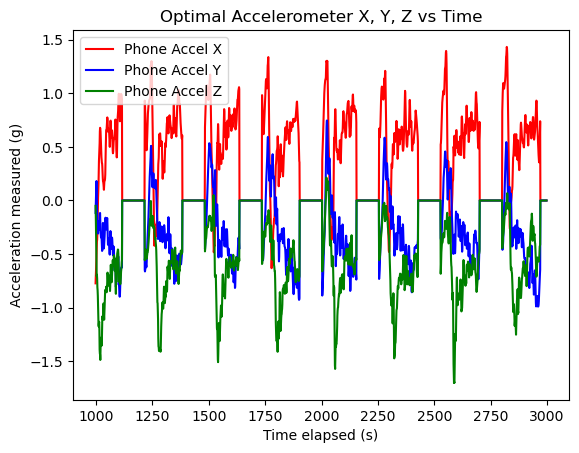

In [135]:
m1 = pd.read_csv("../I dont know what this is/splitbit.csv")

Splitcdate = m1["timekeeper"]

s1 = 1000
it = 2000

# print(m1)

SplitPhoneAccelZ = m1["Phone-Accel-Z"]
SplitPhoneAccelY = m1["Phone-Accel-Y"]
SplitPhoneAccelX = m1["Phone-Accel-X"]

plt.xlabel("Time elapsed (s)")
plt.ylabel("Acceleration measured (g)")
plt.title("Optimal Accelerometer X, Y, Z vs Time")
plt.plot(Splitcdate[s1:s1+it], SplitPhoneAccelX[s1:s1+it], "-r", label="Phone Accel X") 
plt.plot(Splitcdate[s1:s1+it], SplitPhoneAccelY[s1:s1+it], "-b", label="Phone Accel Y") 
plt.plot(Splitcdate[s1:s1+it], SplitPhoneAccelZ[s1:s1+it], "-g", label="Phone Accel Z") 

plt.legend(loc="upper left")
plt.show()

11729
11729


ValueError: Length of values (11728) does not match length of index (11729)

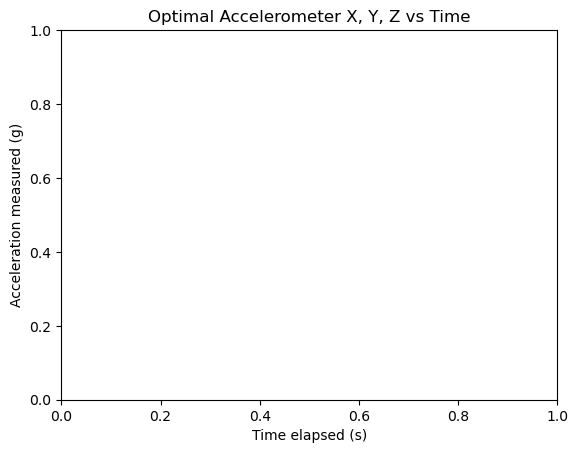

In [97]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Acceleration measured (g)")
plt.title("Optimal Accelerometer X, Y, Z vs Time")


print(m['Phone-Accel-X'].size)
print(m['Elapsed time (s)'].size)

# Phone-Accel-Z
m['y_p'] = np.diff(m['Phone-Accel-X']) / np.diff(m['Elapsed time (s)'])
print("worky")
m['x_p'] = (np.array(m['Elapsed time (s)'])[:-1] + np.array(m['Elapsed time (s)'])[1:]) / 2

plt.figure(1)
plt.plot(data['x'], data['y'], 'r')
plt.plot(data['x_p'], data['y_p'], 'b')
plt.show()

#plt.plot(cdate[startmark:startmark+tl], PhoneAccelX[startmark:startmark+tl], "-r", label="Phone Accel X") 
# plt.plot(cdate[startmark:startmark+tl], PhoneAccelY[startmark:startmark+tl], "-b", label="Phone Accel Y") 
# plt.plot(cdate[startmark:startmark+tl], PhoneAccelZ[startmark:startmark+tl], "-g", label="Phone Accel Z") 

# plt.legend(loc="upper left")
# plt.show()

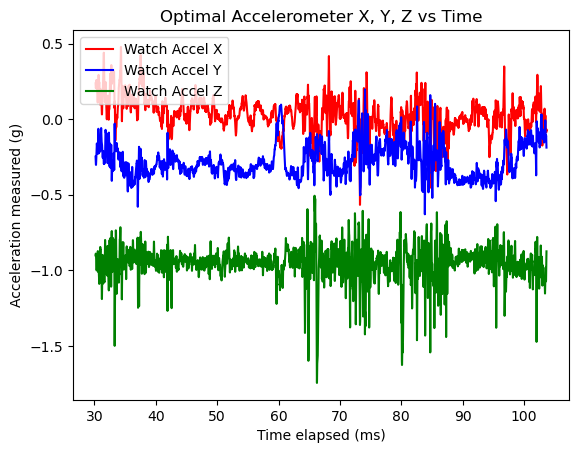

In [42]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Acceleration measured (g)")
plt.title("Optimal Accelerometer X, Y, Z vs Time")
plt.plot(cdate[startmark:endmark], WatchAccelX[startmark:endmark], "-r", label="Watch Accel X") 
plt.plot(cdate[startmark:endmark], WatchAccelY[startmark:endmark], "-b", label="Watch Accel Y") 
plt.plot(cdate[startmark:endmark], WatchAccelZ[startmark:endmark], "-g", label="Watch Accel Z") 

plt.legend(loc="upper left")
plt.show()


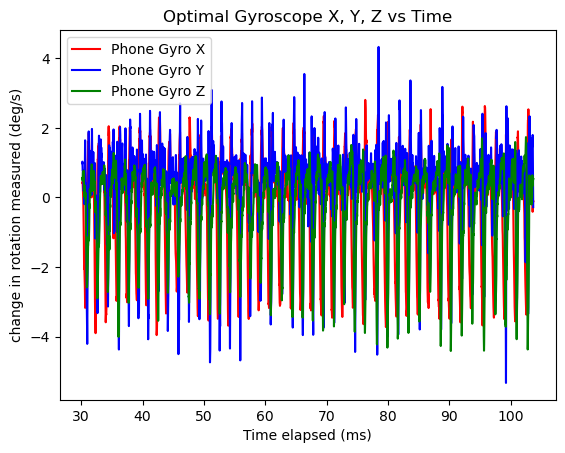

In [43]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("change in rotation measured (deg/s)")
plt.title("Optimal Gyroscope X, Y, Z vs Time")
plt.plot(cdate[startmark:endmark], PhoneGyroX[startmark:endmark], "-r", label="Phone Gyro X") 
plt.plot(cdate[startmark:endmark], PhoneGyroY[startmark:endmark], "-b", label="Phone Gyro Y") 
plt.plot(cdate[startmark:endmark], PhoneGyroZ[startmark:endmark], "-g", label="Phone Gyro Z") 

plt.legend(loc="upper left")
plt.show()



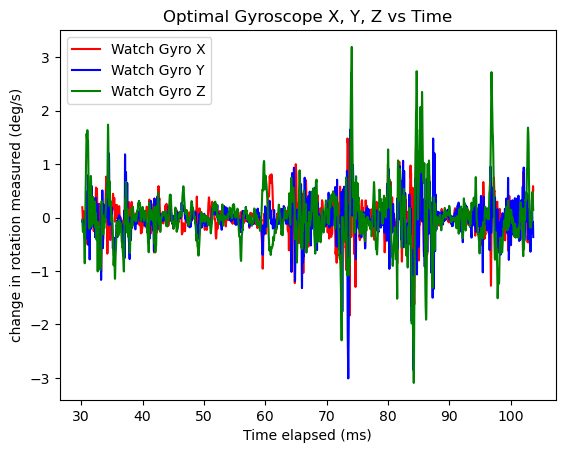

In [44]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("change in rotation measured (deg/s)")
plt.title("Optimal Gyroscope X, Y, Z vs Time")
plt.plot(cdate[startmark:endmark], WatchGyroX[startmark:endmark], "-r", label="Watch Gyro X") 
plt.plot(cdate[startmark:endmark], WatchGyroY[startmark:endmark], "-b", label="Watch Gyro Y") 
plt.plot(cdate[startmark:endmark], WatchGyroZ[startmark:endmark], "-g", label="Watch Gyro Z") 

plt.legend(loc="upper left")
plt.show()

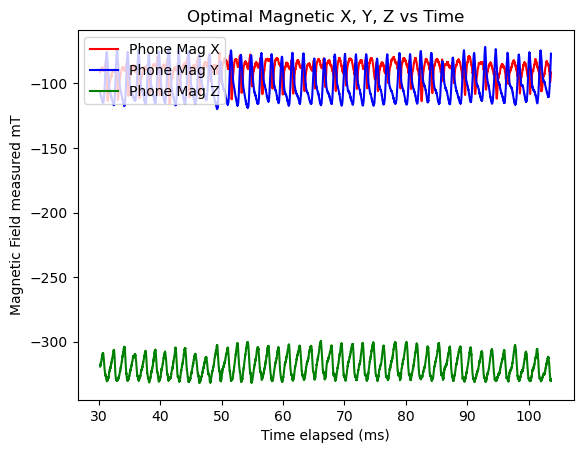

In [45]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Magnetic Field measured mT")
plt.title("Optimal Magnetic X, Y, Z vs Time")
plt.plot(cdate[v:endmark], PhoneMagX[startmark:endmark], "-r", label="Phone Mag X") 
plt.plot(cdate[startmark:endmark], PhoneMagY[startmark:endmark], "-b", label="Phone Mag Y") 
plt.plot(cdate[startmark:endmark], PhoneMagZ[startmark:endmark], "-g", label="Phone Mag Z") 

plt.legend(loc="upper left")
plt.show()

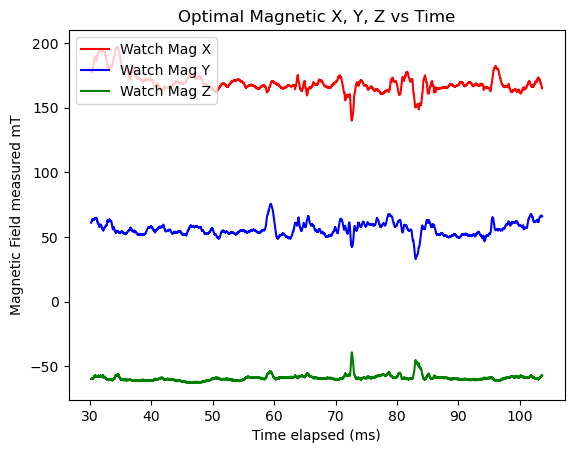

In [46]:
plt.xlabel("Time elapsed (s)")
plt.ylabel("Magnetic Field measured mT")
plt.title("Optimal Magnetic X, Y, Z vs Time")
plt.plot(cdate[startmark:endmark], WatchMagX[startmark:endmark], "-r", label="Watch Mag X") 
plt.plot(cdate[startmark:endmark], WatchMagY[startmark:endmark], "-b", label="Watch Mag Y") 
plt.plot(cdate[startmark:endmark], WatchMagZ[startmark:endmark], "-g", label="Watch Mag Z") 

plt.legend(loc="upper left")
plt.show()

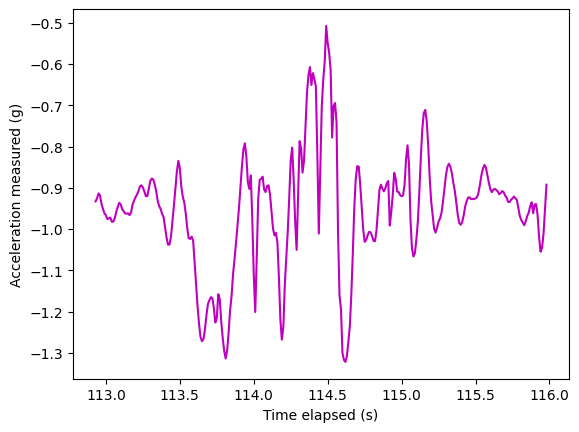

In [79]:
i = 0
# plt.title("Optimal Phone Accelerometer Y vs Time")
plt.xlabel("Time elapsed (s)")
plt.ylabel("Force measured (g)")
plt.plot(cdate[startmark:endmark], WatchAccelY[startmark:endmark], "-m") 

# plt.plot(cdate[startmark:endmark], PhoneAccelX[startmark:endmark]) 
# plt.plot(cdate[startmark:endmark], PhoneAccelY[startmark:endmark]) 
plt.show()

sleep(15)

foundthreshold = 0

while (i < len(cdate)):
    low = 0
#     if (cdate[i] > startmark and foundthreshold == 0):
#         foundthreshold = i
#         low = i
#     elif (cdate[i] > startmark):
#         low = foundthreshold
    
    if (i >= startmark):
        low = startmark
        if (i-low > 500):
            low = i-500
    
        
    plt.xlabel("Time elapsed (s)")
    plt.ylabel("Acceleration measured (g)")
    #plt.plot(cdate[low:i], WatchAccelX[low:i], "-b") 
    #plt.plot(cdate[low:i], PhoneAccelY[low:i], "-r") 
    #plt.plot(cdate[low:i], PhoneAccelZ[low:i], "-g") 
    plt.plot(cdate[low:i], WatchAccelZ[low:i], "-m") 


    plt.draw()
    plt.pause(0.1)
    clear_output(wait=True)
    i += 10